# INTRODUCTION

In this problem set, using Python and Pylab you will design and implement a stochastic simulation of patient and virus population dynamics, and reach conclusions about treatment regimens based on the simulation results.

# BACKGROUND: VIRUSES, DRUG TREATMENTS, AND COMPUTATIONAL MODELS

Viruses such as HIV and H1N1 represent a significant challenge to modern medicine. One of the reasons that they are so difficult to treat is their ability to evolve.

As you may know from introductory biology classes, the traits of an organism are determined by its genetic code. When organisms reproduce, their offspring will inherit genetic information from their parent. This genetic information will be modified, either because of mixing of the two parents' genetic information, or through mutations in the genome replication process, thus introducing diversity into a population.

Viruses are no exception. Two characteristics of viruses make them particularly difficult to treat. The first is that their replication mechanism often lacks the error checking mechanisms that are present in more complex organisms. This speeds up the rate of mutation. Secondly, viruses replicate extremely quickly (orders of magnitude faster than humans) -- thus, while we may be used to thinking of evolution as a process which occurs over long time scales, populations of viruses can undergo substantial evolutionary changes within a single patient over the course of treatment.

These two characteristics allow a virus population to acquire genetic resistance to therapy quickly. In this problem set, we will make use of simulations to explore the effect of introducing drugs on the virus population and determine how best to address these treatment challenges within a simplified model.

Computational modeling has played an important role in the study of viruses such as HIV (for example, see this paper, by MIT graduate David Ho). In this problem, we will implement a highly simplified stochastic model of virus population dynamics. Many details have been swept under the rug (host cells are not explicitly modeled and the size of the population is several orders of magnitude less than the size of actual virus populations). Nevertheless, our model exhibits biologically relevant characteristics and will give you a chance to analyze and interpret interesting simulation data.

SPREAD OF A VIRUS IN A PERSON

In reality, diseases are caused by viruses and have to be treated with medicine, so in the remainder of this problem set, we'll be looking at a detailed simulation of the spread of a virus within a person. We've provided you with skeleton code in ps3b.py.

# Part B - Problem 2: Implementing a Simple Simulation (No Drug Treatment)

(15 points possible)
We start with a trivial model of the virus population - the patient does not take any drugs and the viruses do not acquire resistance to drugs. We simply model the virus population inside a patient as if it were left untreated.

SIMPLEVIRUS CLASS

To implement this model, you will need to fill in the SimpleVirus class, which maintains the state of a single virus particle. You will implement the methods __init__, getMaxBirthProb, getClearProb,doesClear, and reproduce according to the specifications. Use random.random() for generating random numbers to ensure that your results are consistent with ours.

The reproduce method in SimpleVirus should produce an offspring by returning a new instance of SimpleVirus with probability: self.maxBirthProb * (1 - popDensity). This method raises a NoChildException if the virus particle does not reproduce. For a reminder on raising execptions, review the Python docs.

self.maxBirthProb is the birth rate under optimal conditions (the virus population is negligible relative to the available host cells so there is ample nourishment available). popDensity is defined as the ratio of the current virus population to the maximum virus population for a patient and should be calculated in the update method of the Patient class.

In [2]:
''' 
Begin helper code
'''

class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleVirus
    and ResistantVirus classes to indicate that a virus particle does not
    reproduce. You can use NoChildException as is, you do not need to
    modify/add any code.
    """

'''
End helper code
'''

'\nEnd helper code\n'

In [33]:
import random
random.seed(0)

class SimpleVirus(object):
    """
    Representation of a simple virus (does not model drug effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):
        """
        Initialize a SimpleVirus instance, saves all parameters as attributes
        of the instance.        
        maxBirthProb: Maximum reproduction probability (a float between 0-1)        
        clearProb: Maximum clearance probability (a float between 0-1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb


    def getMaxBirthProb(self):
        """
        Returns the max birth probability.
        """
        return self.maxBirthProb
    

    def getClearProb(self):
        """
        Returns the clear probability.
        """
        return self.clearProb
    

    def doesClear(self):
        """ Stochastically determines whether this virus particle is cleared from the
        patient's body at a time step. 
        returns: True with probability self.getClearProb and otherwise returns
        False.
        """
        if self.clearProb > random.random():
            return True
        return False

    
    def reproduce(self, popDensity):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the Patient and
        TreatedPatient classes. The virus particle reproduces with probability
        self.maxBirthProb * (1 - popDensity).
        
        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleVirus (which has the same
        maxBirthProb and clearProb values as its parent).         

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population.         
        
        returns: a new instance of the SimpleVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.               
        """
        #random.seed(0)
        prob = self.maxBirthProb * (1 - popDensity)
        if prob > random.random():
            return SimpleVirus(self.maxBirthProb, self.clearProb)
        else:
            raise NoChildException

# PATIENT CLASS

You will also need to implement the Patient class, which maintains the state of a virus population associated with a patient.

The update method in the Patient class is the inner loop of the simulation. It modifies the state of the virus population for a single time step and returns the total virus population at the end of the time step. At every time step of the simulation, each virus particle has a fixed probability of being cleared (eliminated from the patient's body). If the virus particle is not cleared, it is considered for reproduction. The virus population should never exceed maxPop; if you utilize the population density correctly, you shouldn't need to provide an explicit check for this.

Unlike the clearance probability, which is constant, the probability of a virus particle reproducing is a function of the virus population. With a larger virus population, there are fewer resources in the patient's body to facilitate reproduction, and the probability of reproduction will be lower. One way to think of this limitation is to consider that virus particles need to make use of a patient's cells to reproduce; they cannot reproduce on their own. As the virus population increases, there will be fewer available host cells for viruses to utilize for reproduction.

To summarize, update should first decide which virus particles are cleared and which survive by making use of the doesClear method of each SimpleVirus instance, then update the collection of SimpleVirus instances accordingly. With the surviving SimpleVirus instances, update should then call the reproduce method for each virus particle. Based on the population density of the surviving SimpleVirus instances, reproduce should either return a new instance of SimpleVirus representing the offspring of the virus particle, or raise a NoChildException indicating that the virus particle does not reproduce during the current time step. The update method should update the attributes of the patient appropriately under either of these conditions. After iterating through all the virus particles, the update method returns the number of virus particles in the patient at the end of the time step.

Note that the mapping between time steps and actual time will vary depending on the type of virus being considered, but for this problem set, think of a time step as a simulated hour of time.

In [39]:
class Patient(object):
    """
    Representation of a simplified patient. The patient does not take any drugs
    and his/her virus populations have no drug resistance.
    """    

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes.

        viruses: the list representing the virus population (a list of
        SimpleVirus instances)

        maxPop: the maximum virus population for this patient (an integer)
        """
        self.viruses = viruses
        self.maxPop = maxPop
        self.densite = len(self.viruses) / float(self.maxPop)
        

    def getViruses(self):
        """
        Returns the viruses in this Patient.
        """
        return self.viruses


    def getMaxPop(self):
        """
        Returns the max population.
        """
        return self.maxPop


    def getTotalPop(self):
        """
        Gets the size of the current total virus population. 
        returns: The total virus population (an integer)
        """
        return len(self.viruses)


    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute the following steps in this order:
        
        - Determine whether each virus particle survives and updates the list
        of virus particles accordingly.   
        
        - The current population density is calculated. This population density
          value is used until the next call to update() 
        
        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.                    

        returns: The total virus population at the end of the update (an
        integer)
        """
        for virus in self.viruses[:]:
            if virus.doesClear():
                self.viruses.remove(virus)
                
        for virus in self.viruses[:]:
            self.density = float(self.getTotalPop())/self.maxPop
            if self.density < 1:
                try:   
                    newVirus = virus.reproduce(self.density)
                    self.viruses.append(newVirus)
                except NoChildException:
                    pass
        return self.getTotalPop()

In [40]:
# Testing classes
print 'Start of testing...'

v1 = SimpleVirus(1.0, 0.0)
print '- Testing "doesClear" and "reproduce" methods'
assert v1.doesClear() == False
assert v1.doesClear() == False

v1 = SimpleVirus(1.0, 1.0)
assert v1.doesClear() == True

v1 = SimpleVirus(0.96, 0.13)
popDensity = 0.02
assert isinstance(v1.reproduce(popDensity), SimpleVirus)

v1 = SimpleVirus(0.20, 0.13)
popDensity = 0.02
try:
    v1.reproduce(popDensity)
    print 'ERROR in reproduce()'
except NoChildException:
    pass

virus = SimpleVirus(1.0, 0.0)
patient = Patient([virus], 100)
print '- Testing patient for 1 trial...'
assert patient.getTotalPop() == 1

print 'End of testing.'

Start of testing...
- Testing "doesClear" and "reproduce" methods
- Testing patient for 1 trial...
End of testing.


# Part B - Problem 3-1: Running and Analyzing a Simple Simulation (No Drug Treatment)

(10 points possible)
You should start by understanding the population dynamics before introducing any drug.

Fill in the function simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb, numTrials) that instantiates a Patient, simulates changes to the virus population for 300 time steps (i.e., 300 calls to update), and plots the average size of the virus population as a function of time; that is, the x-axis should correspond to the number of elapsed time steps, and the y-axis should correspond to the average size of the virus population in the patient. The population at time=0 is the population after the first call to update.

Run the simulation for numTrials trials, where numTrials in this case can be up to 100 trials. Use pylab to produce a plot (with a single curve) that displays the average result of running the simulation for many trials. Make sure you run enough trials so that the resulting plot does not change much in terms of shape and time steps taken for the average size of the virus population to become stable. Don't forget to include axes labels, a legend for the curve, and a title on your plot.

You should call simulationWithoutDrug with the following parameters:

numViruses = 100

maxPop (maximum sustainable virus population) = 1000

maxBirthProb (maximum reproduction probability for a virus particle) = 0.1

clearProb (maximum clearance probability for a virus particle) = 0.05

Thus, your simulation should be instantiatating one Patient with a list of 100 SimpleVirus instances. Each SimpleVirus instance in the viruses list should be initialized with the proper values for maxBirthProb and clearProb.

For further testing, we have provided the .pyc (compiled Python) files for the completed Patient and SimpleVirus classes (and for Problem 5, the ResistantVirus and TreatedPatient classes) that you can use to confirm that your code is generating the correct results during simulation.

If you comment out your versions of these classes in ps3b.py, and add the following import statements to the top of your file, you can run the simulation using our pre-compiled implementation of these classes to make sure you are obtaining the correct results. This is a good way to test if you've implemented these classes correctly. Make sure to comment out the import statement and uncomment your implementations before moving to Problem 4.

For Python 2.7:

```python
from ps3b_precompiled_27 import *
```

In [102]:
import numpy
import pylab
%matplotlib inline

#set line width
pylab.rcParams['lines.linewidth'] = 3
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 10
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 10
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 3
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 3

def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb, numTrials):
    """
    Run the simulation and plot the graph for problem 3 (no drugs are used,
    viruses do not have any drug resistance).    
    For each of numTrials trial, instantiates a patient, runs a simulation
    for 300 timesteps, and plots the average virus population size as a
    function of time.

    numViruses: number of SimpleVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: Maximum clearance probability (a float between 0-1)
    numTrials: number of simulation runs to execute (an integer)
    """    
    virusList = [0]*300
    for trial in range(numTrials):
        viruses = []
        for _ in range(numViruses):
            viruses.append(SimpleVirus(maxBirthProb, clearProb)) #SimpleVirus(maxBirthProb, clearProb)
    
        patient = Patient(viruses, maxPop) #Patient(viruses, maxPop)
        sizePop = []
        for step in range(300):
            patient.update()
            virusList[step] += patient.getTotalPop()
      
    avgList = [float(k)/numTrials for k in virusList]
    
    pylab.title('SimpleVirus simulation')
    pylab.xlabel('Time Steps')
    pylab.ylabel('Average Virus Population')
    pylab.plot(avgList, label = 'Viruses')
    pylab.legend()
    pylab.show()

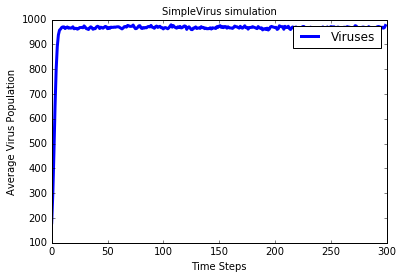

In [103]:
# Simulation: viruses grow quickly
simulationWithoutDrug(100, 1000, 0.99, 0.05, 2)

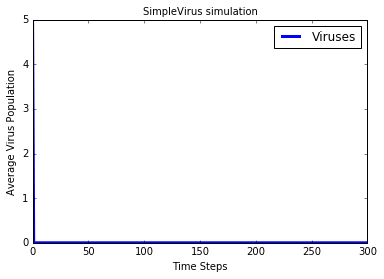

In [105]:
# Simulation: viruses quickly die
simulationWithoutDrug(100, 1000, 0.1, 0.99, 2)

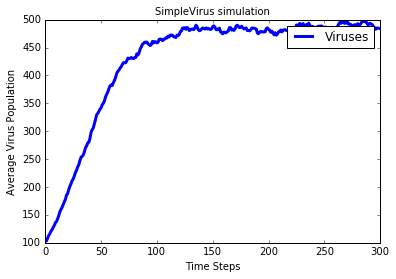

In [104]:
# Simulation: Normal steps
simulationWithoutDrug(100, 1000, 0.1, 0.05, 8)

# Part B - Problem 4: Implementing a Simulation With Drugs

(10 points possible)
In this problem, we consider the effects of both administering drugs to the patient and the ability of virus particle offsprings to inherit or mutate genetic traits that confer drug resistance. As the virus population reproduces, mutations will occur in the virus offspring, adding genetic diversity to the virus population. Some virus particles gain favorable mutations that confer resistance to drugs.

RESISTANTVIRUS CLASS

In order to model this effect, we introduce a subclass of SimpleVirus called ResistantVirus. ResistantVirus maintains the state of a virus particle's drug resistances, and accounts for the inheritance of drug resistance traits to offspring. Implement the ResistantVirus class.

In [63]:
class ResistantVirus(SimpleVirus):
    """
    Representation of a virus which can have drug resistance.
    """   

    def __init__(self, maxBirthProb, clearProb, resistances, mutProb):
        """
        Initialize a ResistantVirus instance, saves all parameters as attributes
        of the instance.

        maxBirthProb: Maximum reproduction probability (a float between 0-1)       
        clearProb: Maximum clearance probability (a float between 0-1).

        resistances: A dictionary of drug names (strings) mapping to the state
        of this virus particle's resistance (either True or False) to each drug.
        e.g. {'guttagonol':False, 'srinol':False}, means that this virus
        particle is resistant to neither guttagonol nor srinol.
        mutProb: Mutation probability for this virus particle (a float). This is
        the probability of the offspring acquiring or losing resistance to a drug.
        """
        SimpleVirus.__init__(self, maxBirthProb, clearProb)
        self.resistances = resistances
        self.mutProb = mutProb


    def getResistances(self):
        """
        Returns the resistances for this virus.
        """
        return self.resistances
    

    def getMutProb(self):
        """
        Returns the mutation probability for this virus.
        """
        return self.mutProb
    

    def isResistantTo(self, drug):
        """
        Get the state of this virus particle's resistance to a drug. This method
        is called by getResistPop() in TreatedPatient to determine how many virus
        particles have resistance to a drug.       

        drug: The drug (a string)

        returns: True if this virus instance is resistant to the drug, False
        otherwise.
        """
        if self.resistances.has_key(drug):
            return self.resistances[drug]
        return False


    def reproduce(self, popDensity, activeDrugs):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the TreatedPatient class.

        A virus particle will only reproduce if it is resistant to ALL the drugs
        in the activeDrugs list. For example, if there are 2 drugs in the
        activeDrugs list, and the virus particle is resistant to 1 or no drugs,
        then it will NOT reproduce.

        Hence, if the virus is resistant to all drugs
        in activeDrugs, then the virus reproduces with probability:      

        self.maxBirthProb * (1 - popDensity).                       

        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring ResistantVirus (which has the same
        maxBirthProb and clearProb values as its parent). The offspring virus
        will have the same maxBirthProb, clearProb, and mutProb as the parent.

        For each drug resistance trait of the virus (i.e. each key of
        self.resistances), the offspring has probability 1-mutProb of
        inheriting that resistance trait from the parent, and probability
        mutProb of switching that resistance trait in the offspring.       

        For example, if a virus particle is resistant to guttagonol but not
        srinol, and self.mutProb is 0.1, then there is a 10% chance that
        that the offspring will lose resistance to guttagonol and a 90%
        chance that the offspring will be resistant to guttagonol.
        There is also a 10% chance that the offspring will gain resistance to
        srinol and a 90% chance that the offspring will not be resistant to
        srinol.

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population       

        activeDrugs: a list of the drug names acting on this virus particle
        (a list of strings).

        returns: a new instance of the ResistantVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.
        """
        #random.seed(0)
        for drug in activeDrugs:
            if not self.isResistantTo(drug):
                break
        else:
            prob = self.maxBirthProb * (1 - popDensity)
            if prob > random.random():
                childResistance = {}
                for drug in self.resistances:
                    if self.resistances[drug]:
                        if (1-self.mutProb) > random.random():
                            childResistance[drug] = True
                        else:
                            childResistance[drug] = False
                    else:
                        if self.mutProb > random.random():
                            childResistance[drug] = True
                        else:
                            childResistance[drug] = False
                return ResistantVirus(self.maxBirthProb, self.clearProb, childResistance, self.mutProb)
        raise NoChildException

In [85]:
# Testing ResistantVirus
# ResistantVirus(maxBirthProb, clearProb, resistances, mutProb)
virus = ResistantVirus(0.0, 1.0, {}, 0.0)
assert virus.doesClear()
virus = ResistantVirus(0.0, 1.0, {"drug1":True, "drug2":False}, 0.0)
assert not virus.isResistantTo('drug2')
try:
    virus.reproduce(0, [])
    virus.isResistantTo('drug2')
except NoChildException:
    pass
try:
    virus = ResistantVirus(1.0, 0.0, {"drug1":True, "drug2":False}, 0.0)
    virus.reproduce(0, ["drug2"])
except NoChildException:
    pass
virus = ResistantVirus(1.0, 0.0, {"drug2": True}, 1.0)
child = virus.reproduce(0, ["drug2"])
assert not child.isResistantTo("drug2")
child = virus.reproduce(0, ["drug2"])
assert not child.isResistantTo("drug2")
assert not child.isResistantTo("drug2")

# Part B - Problem 4: TreatedPatient Class

(10 points possible)
We also need a representation for a patient that accounts for the use of drug treatments and manages a collection of ResistantVirus instances. For this, we introduce the TreatedPatient class, which is a subclass of Patient. TreatedPatient must make use of the new methods in ResistantVirus and maintain the list of drugs that are administered to the patient.

Drugs are given to the patient using the TreatedPatient class's addPrescription() method. What happens when a drug is introduced? The drugs we consider do not directly kill virus particles lacking resistance to the drug, but prevent those virus particles from reproducing (much like actual drugs used to treat HIV). Virus particles with resistance to the drug continue to reproduce normally. Implement the TreatedPatient class.

In [87]:
class TreatedPatient(Patient):
    """
    Representation of a patient. The patient is able to take drugs and his/her
    virus population can acquire resistance to the drugs he/she takes.
    """

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes. Also initializes the list of drugs being administered
        (which should initially include no drugs).              

        viruses: The list representing the virus population (a list of
        virus instances)

        maxPop: The  maximum virus population for this patient (an integer)
        """
        Patient.__init__(self, viruses, maxPop)
        self.drugs = []


    def addPrescription(self, newDrug):
        """
        Administer a drug to this patient. After a prescription is added, the
        drug acts on the virus population for all subsequent time steps. If the
        newDrug is already prescribed to this patient, the method has no effect.

        newDrug: The name of the drug to administer to the patient (a string).

        postcondition: The list of drugs being administered to a patient is updated
        """
        if newDrug not in self.drugs:
            self.drugs.append(newDrug)


    def getPrescriptions(self):
        """
        Returns the drugs that are being administered to this patient.

        returns: The list of drug names (strings) being administered to this
        patient.
        """
        return self.drugs


    def getResistPop(self, drugResist):
        """
        Get the population of virus particles resistant to the drugs listed in
        drugResist.       

        drugResist: Which drug resistances to include in the population (a list
        of strings - e.g. ['guttagonol'] or ['guttagonol', 'srinol'])

        returns: The population of viruses (an integer) with resistances to all
        drugs in the drugResist list.
        """
        resistVirus = 0
        for virus in self.getViruses():
            resist = True
            for drug in drugResist:
                if not(virus.isResistantTo(drug)):
                    resist = False
            if resist:
                resistVirus += 1
        return resistVirus


    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute these actions in order:

        - Determine whether each virus particle survives and update the list of
          virus particles accordingly

        - The current population density is calculated. This population density
          value is used until the next call to update().

        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.
          The list of drugs being administered should be accounted for in the
          determination of whether each virus particle reproduces.

        returns: The total virus population at the end of the update (an
        integer)
        """
        for virus in self.viruses[:]:
            if virus.doesClear():
                self.viruses.remove(virus)

        self.densPop = len(self.viruses) / float(self.maxPop)
        
        if self.densPop <= 1:
            for virus in self.viruses[:]:
                try:
                    self.viruses.append(virus.reproduce(self.densPop, self.drugs))
                except NoChildException:
                    pass
        return len(self.viruses)


In [88]:
# Testing pacient
tp = TreatedPatient([], 100)
print(tp.getPrescriptions())
tp.addPrescription('A')
print(len(tp.getPrescriptions()))
tp.addPrescription('B')
print(len(tp.getPrescriptions()))
tp.addPrescription('A')
print(len(tp.getPrescriptions()))
virus1 = ResistantVirus(1.0, 0.0, {"drug1": True}, 0.0)
virus2 = ResistantVirus(1.0, 0.0, {"drug1": False}, 0.0)
patient = TreatedPatient([virus1, virus2], 1000000)
patient.addPrescription("drug1")
patient.update()
patient.update()
patient.update()
patient.update()
patient.update()

[]
1
2
2


33

# Part B - Problem 5: Running and Analyzing a Simulation With a Drug

(10 points possible)
In this problem, we will use the implementation you filled in for Problem 4 to run a simulation. You will create a TreatedPatient instance with the following parameters, then run the simulation:

- viruses, a list of 100 ResistantVirus instances
- maxPop, maximum sustainable virus population = 1000

Each ResistantVirus instance in the viruses list should be initialized with the following parameters:

- maxBirthProb, maximum reproduction probability for a virus particle = 0.1
- clearProb, maximum clearance probability for a virus particle = 0.05
- resistances, The virus's genetic resistance to drugs in the experiment = {'guttagonol': False}
- mutProb, probability of a mutation in a virus particle's offspring = 0.005

Run a simulation that consists of 150 time steps, followed by the addition of the drug, guttagonol, followed by another 150 time steps. You should make use of the function simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, resistances, mutProb, numTrials). As with problem 3, perform up to 100 trials and make sure that your results are repeatable and representative.

Create one plot that records both the average total virus population and the average population of guttagonol-resistant virus particles over time.

A few good questions to consider as you look at your plots are: What trends do you observe? Are the trends consistent with your intuition? Feel free to discuss the answers to these questions in the forum, to fully cement your understanding of this problem set, processing and interpreting data.

Again, as in Problem 3, you can use the provided .pyc file to check that your implementation of the TreatedPatient and ResistantVirus classes work as expected.

In [100]:
def simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, resistances,
                       mutProb, numTrials):
    """
    Runs simulations and plots graphs for problem 5.

    For each of numTrials trials, instantiates a patient, runs a simulation for
    150 timesteps, adds guttagonol, and runs the simulation for an additional
    150 timesteps.  At the end plots the average virus population size
    (for both the total virus population and the guttagonol-resistant virus
    population) as a function of time.

    numViruses: number of ResistantVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: maximum clearance probability (a float between 0-1)
    resistances: a dictionary of drugs that each ResistantVirus is resistant to
                 (e.g., {'guttagonol': False})
    mutProb: mutation probability for each ResistantVirus particle
             (a float between 0-1). 
    numTrials: number of simulation runs to execute (an integer)
    
    """
    virusList = [0]*300
    resitList = [0]*300
    for trial in range(numTrials):
        viruses = []
        for i in range(numViruses):
            viruses.append(ResistantVirus(maxBirthProb, clearProb, resistances, mutProb))
        patient = TreatedPatient(viruses, maxPop)

        sizePop = []
        for step in range(300):
            if step == 150:
                patient.addPrescription('guttagonol')
            patient.update()
            virusList[step] += patient.getTotalPop()
            resitList[step] += patient.getResistPop(['guttagonol'])
      
    avgVirusList = [float(k)/numTrials for k in virusList]
    avgResistList = [float(k)/numTrials for k in resitList]
    
    pylab.plot(avgVirusList, label = 'Total virus count')
    pylab.plot(avgResistList, label = 'Guttagonol-resistant count')
    pylab.xlabel('Time step')
    pylab.ylabel('Virus count')
    pylab.title('Virus resistance simulation')
    pylab.legend()
    pylab.show()

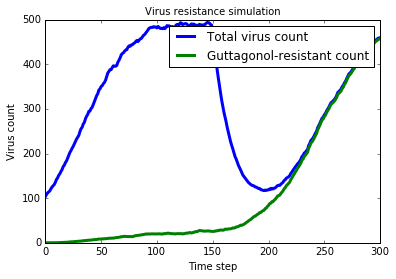

In [106]:
simulationWithDrug(100, 1000, 0.1, 0.05, {'guttagonol': False}, 0.005, 10)